Resources Used
- wget.download('https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py')
- Setup https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

# 0. Setup Paths

In [1]:
WORKSPACE_PATH = 'Tensorflow/workspace'
SCRIPTS_PATH = 'Tensorflow/scripts'
APIMODEL_PATH = 'Tensorflow/models'
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'
OUTPUT_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/export'
TFJS_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/tfjsexport'

In [10]:
%matplotlib inline

# 1. Create Label Map

In [2]:
labels = [
    {'name':'A', 'id':1}, 
    {'name':'B', 'id':2},
    {'name':'C', 'id':3},
    {'name':'D', 'id':4},
    {'name':'E', 'id':5},
    {'name':'F', 'id':6},
    {'name':'G', 'id':7},
    {'name':'H', 'id':8},
    {'name':'I', 'id':9},
    {'name':'J', 'id':10},
    {'name':'K', 'id':11},
    {'name':'L', 'id':12},
    {'name':'M', 'id':13},
    {'name':'N', 'id':14},
    {'name':'O', 'id':15},
    {'name':'P', 'id':16},
    {'name':'Q', 'id':17},
    {'name':'R', 'id':18},
    {'name':'S', 'id':19},
    {'name':'T', 'id':20},
    {'name':'U', 'id':21},
    {'name':'V', 'id':22},
    {'name':'W', 'id':23},
    {'name':'X', 'id':24},
    {'name':'Y', 'id':25},
    {'name':'Z', 'id':26},
]

with open(ANNOTATION_PATH + '\label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 2. Create TF records

In [3]:
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x {IMAGE_PATH + '/train'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/train.record'}
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x{IMAGE_PATH + '/test'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/test.record'}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record


C:\Users\Zein\Documents\RealTimeObjectDetection\Tensorflow\scripts\generate_tfrecord.py:21: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


C:\Users\Zein\Documents\RealTimeObjectDetection\Tensorflow\scripts\generate_tfrecord.py:21: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 3. Download TF Models Pretrained Models from Tensorflow Model Zoo

In [4]:
!cd Tensorflow && git clone https://github.com/tensorflow/models

Cloning into 'models'...


In [6]:
#wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
#!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRETRAINED_MODEL_PATH}
#!cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# 4. Copy Model Config to Training Folder

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [7]:
!mkdir {'Tensorflow\workspace\models\\'+CUSTOM_MODEL_NAME}

A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet already exists.


In [6]:
!mkdir {'Tensorflow\workspace\models\\'+CUSTOM_MODEL_NAME}
!cp {PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}

'cp' is not recognized as an internal or external command,
operable program or batch file.


# 5. Update Config For Transfer Learning

In [2]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [6]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

In [7]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [8]:
config

{'model': ssd {
   num_classes: 26
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [9]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [10]:
len(labels)

NameError: name 'labels' is not defined

In [10]:
pipeline_config.model.ssd.num_classes = 26
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [11]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [12]:
print("""python {}/research/object_detection/model_main_tf2.py --model_dir={}/{} --pipeline_config_path={}/{}/pipeline.config --num_train_steps=20000""".format(APIMODEL_PATH, MODEL_PATH,CUSTOM_MODEL_NAME,MODEL_PATH,CUSTOM_MODEL_NAME))

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=20000


In [4]:
print("""python {}/research/object_detection/model_main_tf2.py --model_dir={}/{} --pipeline_config_path={}/{}/pipeline.config --checkpoint_dir={}/{}
""".format(APIMODEL_PATH, MODEL_PATH, CUSTOM_MODEL_NAME, MODEL_PATH, CUSTOM_MODEL_NAME, MODEL_PATH, CUSTOM_MODEL_NAME))

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet



# 7. Load Train Model From Checkpoint

In [3]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [4]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 8. Detect in Real-Time

In [7]:
import cv2 
import numpy as np

In [6]:
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

In [ ]:
cap.release()

In [8]:
# Setup capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [ ]:
while True: 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        break

In [42]:
detections = detect_fn(input_tensor)

In [67]:
from matplotlib import pyplot as plt

In [8]:
#freeze graph
print("python {}/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path={}/{}/pipeline.config --trained_checkpoint_dir={}/{} --output_directory={}".format(APIMODEL_PATH, MODEL_PATH, CUSTOM_MODEL_NAME, MODEL_PATH, CUSTOM_MODEL_NAME, OUTPUT_PATH))

python Tensorflow/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [9]:
print("tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {}/saved_model {}".format(OUTPUT_PATH, TFJS_PATH))

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


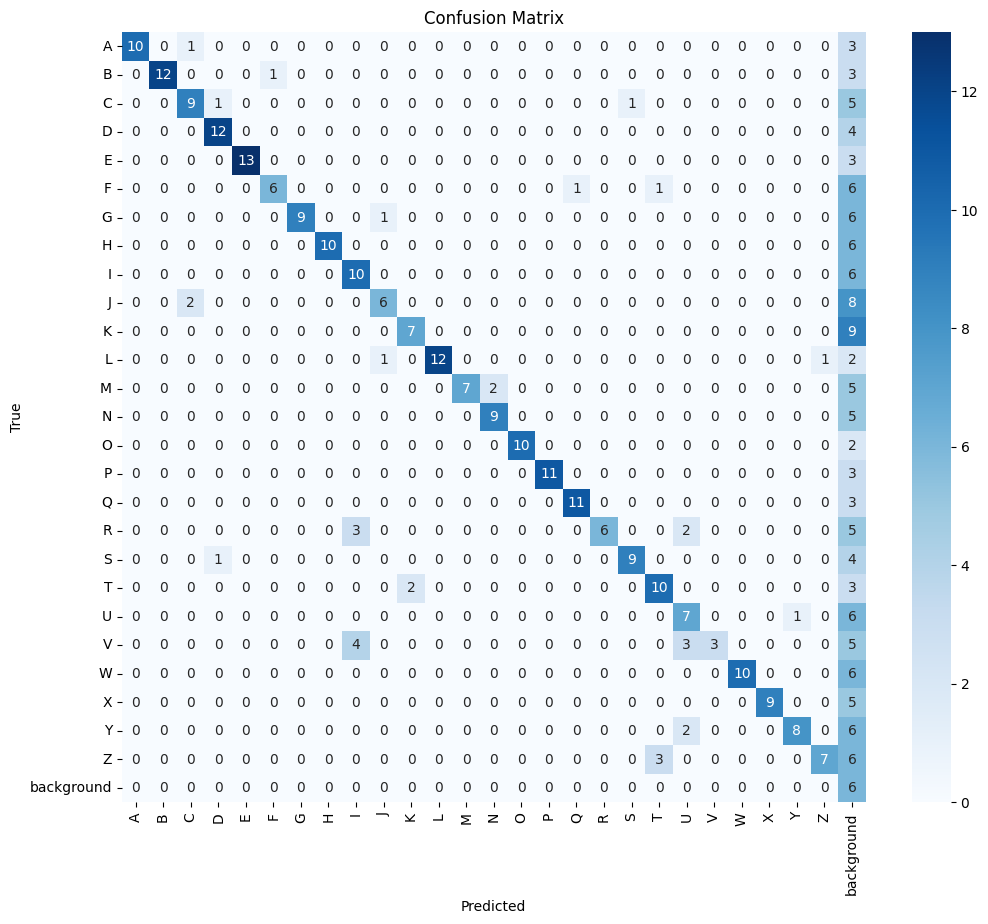

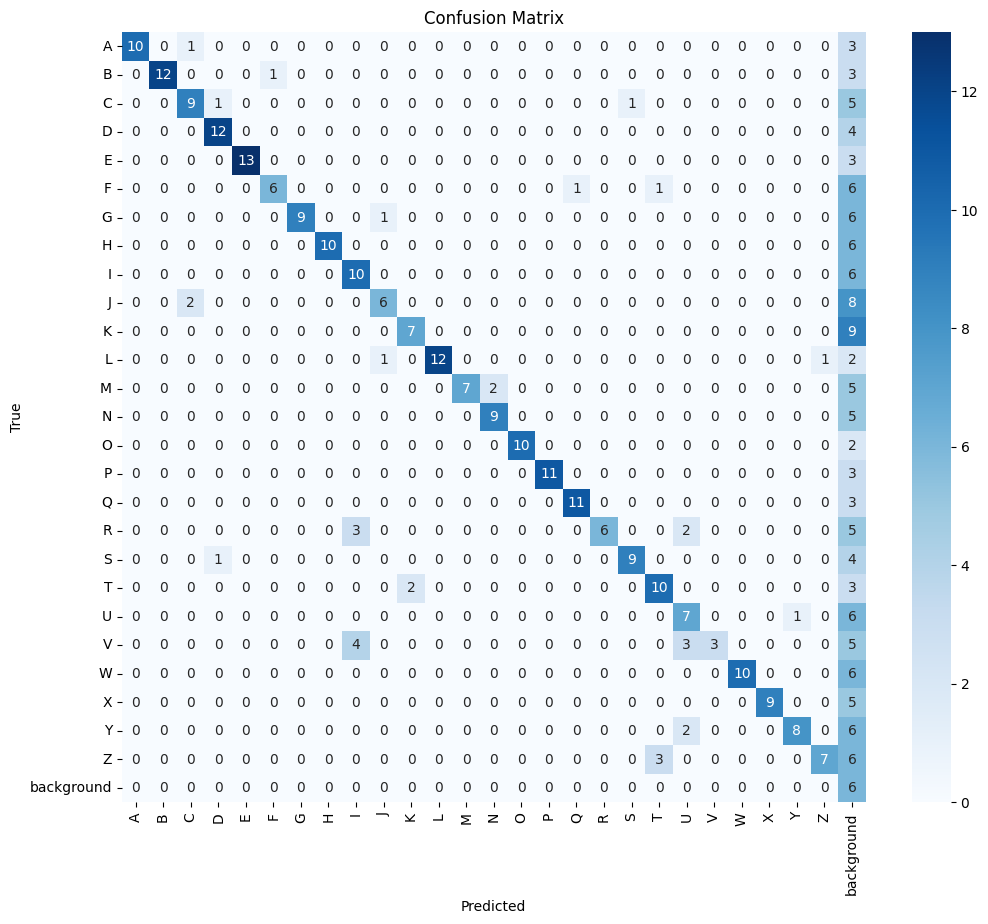

In [11]:
import os
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from object_detection.utils import label_map_util
import tensorflow as tf

# Paths
TEST_PATH = IMAGE_PATH+'/test'
# Load label map
label_map = label_map_util.load_labelmap(os.path.join(ANNOTATION_PATH, 'label_map.pbtxt'))
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Function to parse XML files
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = root.findall('object')
    return [obj.find('name').text for obj in objects]

# Get ground truth labels
def get_ground_truth():
    true_labels = []
    for xml_file in os.listdir(TEST_PATH):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(TEST_PATH, xml_file)
            labels = parse_xml(xml_path)
            # If multiple objects, just take the first one for simplicity
            true_labels.append(labels[0] if labels else 'background')
    return true_labels

# Get predictions from your model
def get_predictions(detect_fn):
    predictions = []
    for image_file in os.listdir(TEST_PATH):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(TEST_PATH, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)
            detections = detect_fn(input_tensor)
            
            pred_classes = detections['detection_classes'][0].numpy().astype(np.int32)
            pred_scores = detections['detection_scores'][0].numpy()
            
            # Consider only predictions above a certain threshold
            high_scores_idx = np.where(pred_scores > 0.5)[0]
            if len(high_scores_idx) > 0:
                pred_class = pred_classes[high_scores_idx[0]]
                predictions.append(category_index[pred_class + 1]['name'])
            else:
                predictions.append('background')
    return predictions

# Get ground truth and predictions
true_labels = get_ground_truth()
pred_labels = get_predictions(detect_fn)

# Get unique labels from both true_labels and pred_labels
all_labels = sorted(set(true_labels + pred_labels))

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

# Visualize confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import numpy as np

# Assuming 'cm' is your confusion matrix

# Calculate accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

# Calculate per-class metrics
n_classes = cm.shape[0]
precision = np.zeros(n_classes)
recall = np.zeros(n_classes)
f1_score = np.zeros(n_classes)

for i in range(n_classes):
    precision[i] = cm[i,i] / np.sum(cm[:,i]) if np.sum(cm[:,i]) != 0 else 0
    recall[i] = cm[i,i] / np.sum(cm[i,:]) if np.sum(cm[i,:]) != 0 else 0
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

# Calculate macro-averaged scores
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1_score)

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")

# If you want to see per-class scores:
for i, class_name in enumerate(all_labels):
    print(f"\nClass: {class_name}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-score: {f1_score[i]:.4f}")

Accuracy: 0.6005
Macro Precision: 0.8607
Macro Recall: 0.6122
Macro F1-score: 0.6784

Class: A
Precision: 1.0000
Recall: 0.7143
F1-score: 0.8333

Class: B
Precision: 1.0000
Recall: 0.7500
F1-score: 0.8571

Class: C
Precision: 0.7500
Recall: 0.5625
F1-score: 0.6429

Class: D
Precision: 0.8571
Recall: 0.7500
F1-score: 0.8000

Class: E
Precision: 1.0000
Recall: 0.8125
F1-score: 0.8966

Class: F
Precision: 0.8571
Recall: 0.4286
F1-score: 0.5714

Class: G
Precision: 1.0000
Recall: 0.5625
F1-score: 0.7200

Class: H
Precision: 1.0000
Recall: 0.6250
F1-score: 0.7692

Class: I
Precision: 0.5882
Recall: 0.6250
F1-score: 0.6061

Class: J
Precision: 0.7500
Recall: 0.3750
F1-score: 0.5000

Class: K
Precision: 0.7778
Recall: 0.4375
F1-score: 0.5600

Class: L
Precision: 1.0000
Recall: 0.7500
F1-score: 0.8571

Class: M
Precision: 1.0000
Recall: 0.5000
F1-score: 0.6667

Class: N
Precision: 0.8182
Recall: 0.6429
F1-score: 0.7200

Class: O
Precision: 1.0000
Recall: 0.8333
F1-score: 0.9091

Class: P
Preci